### This project is intended for Beginner Machine Learning/Data Analysis
- EE257 Machine Learning for Electrical Engineers - San Jose State University

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
Submission = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/submission.csv')
Test = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/test.csv')  
Train = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/train.csv')
Submission.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,1685.179042,3.042842e-190
1,2,3132.985305,8.271301e-190
2,3,4580.791568,2.248373e-189
3,4,5519.048604,6.111711e-189
4,5,5968.801482,1.661335e-188


In [3]:
# Data Analysis
Test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04
3,4,NaN,Afghanistan,2020-04-05
4,5,NaN,Afghanistan,2020-04-06


In [4]:
Test.corr()

,ForecastId
ForecastId,1.0


In [5]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13459 entries, 0 to 13458
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ForecastId      13459 non-null  int64 
 1   Province_State  5719 non-null   object
 2   Country_Region  13459 non-null  object
 3   Date            13459 non-null  object
dtypes: int64(1), object(3)
memory usage: 420.7+ KB


In [6]:
Test.describe()

,ForecastId
count,13459.000000
mean,6730.000000
std,3885.422971
min,1.000000
25%,3365.500000
50%,6730.000000
75%,10094.500000
max,13459.000000


In [7]:
Test.shape

(13459, 4)

In [8]:
Train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [9]:
Train.corr()

,Id,ConfirmedCases,Fatalities
Id,1.000000,0.069018,0.049932
ConfirmedCases,0.069018,1.000000,0.890192
Fatalities,0.049932,0.890192,1.000000


In [10]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35995 entries, 0 to 35994
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              35995 non-null  int64  
 1   Province_State  15295 non-null  object 
 2   Country_Region  35995 non-null  object 
 3   Date            35995 non-null  object 
 4   ConfirmedCases  35995 non-null  float64
 5   Fatalities      35995 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ MB


In [11]:
Train.describe()

,Id,ConfirmedCases,Fatalities
count,35995.000000,35995.000000,35995.000000
mean,17998.000000,3683.508737,243.560217
std,10391.005806,18986.978708,1832.966999
min,1.000000,0.000000,0.000000
25%,8999.500000,0.000000,0.000000
50%,17998.000000,19.000000,0.000000
75%,26996.500000,543.000000,7.000000
max,35995.000000,345813.000000,33998.000000


In [12]:
Train.shape

(35995, 6)

In [13]:
ConfirmedCases = Train["ConfirmedCases"]

In [14]:
Fatalities = Train["Fatalities"]

In [15]:
Train["Date"] = Train["Date"].apply(pd.to_datetime, "%m/%d/%Y")
Test["Date"] = Test["Date"].apply(pd.to_datetime, "%m/%d/%Y")

## Dataset Cleaning - Dataset Concatenate

In [16]:
confirmedTotal = Train.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalTotal = Train.groupby(['Date']).agg({'Fatalities':['sum']})
totalDate = confirmedTotal.join(fatalTotal)

In [17]:
print(totalDate)

           ConfirmedCases Fatalities
                      sum        sum
Date                                
2020-01-22          554.0       17.0
2020-01-23          653.0       18.0
2020-01-24          939.0       26.0
2020-01-25         1432.0       42.0
2020-01-26         2113.0       56.0
...                   ...        ...
2020-05-11      4176589.0   286293.0
2020-05-12      4260955.0   291924.0
2020-05-13      4345950.0   297155.0
2020-05-14      4440974.0   302370.0
2020-05-15      4540926.0   307611.0

[115 rows x 2 columns]


In [18]:
confirmedCases = totalDate.iloc[0:100,0]
print(confirmedCases)
fatalities = totalDate.iloc[0:100,1]
print(fatalities)

Date
2020-01-22        554.0
2020-01-23        653.0
2020-01-24        939.0
2020-01-25       1432.0
2020-01-26       2113.0
                ...    
2020-04-26    2954851.0
2020-04-27    3023542.0
2020-04-28    3097049.0
2020-04-29    3172102.0
2020-04-30    3256709.0
Name: (ConfirmedCases, sum), Length: 100, dtype: float64
Date
2020-01-22        17.0
2020-01-23        18.0
2020-01-24        26.0
2020-01-25        42.0
2020-01-26        56.0
                ...   
2020-04-26    209894.0
2020-04-27    214478.0
2020-04-28    220795.0
2020-04-29    227659.0
2020-04-30    233352.0
Name: (Fatalities, sum), Length: 100, dtype: float64


In [19]:
cases = totalDate.iloc[0:100,1:2]
print(cases)

           Fatalities
                  sum
Date                 
2020-01-22       17.0
2020-01-23       18.0
2020-01-24       26.0
2020-01-25       42.0
2020-01-26       56.0
...               ...
2020-04-26   209894.0
2020-04-27   214478.0
2020-04-28   220795.0
2020-04-29   227659.0
2020-04-30   233352.0

[100 rows x 1 columns]


In [20]:
#totalDate.to_csv(path+'/ConfirmFatal.csv',mode='a')

In [21]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

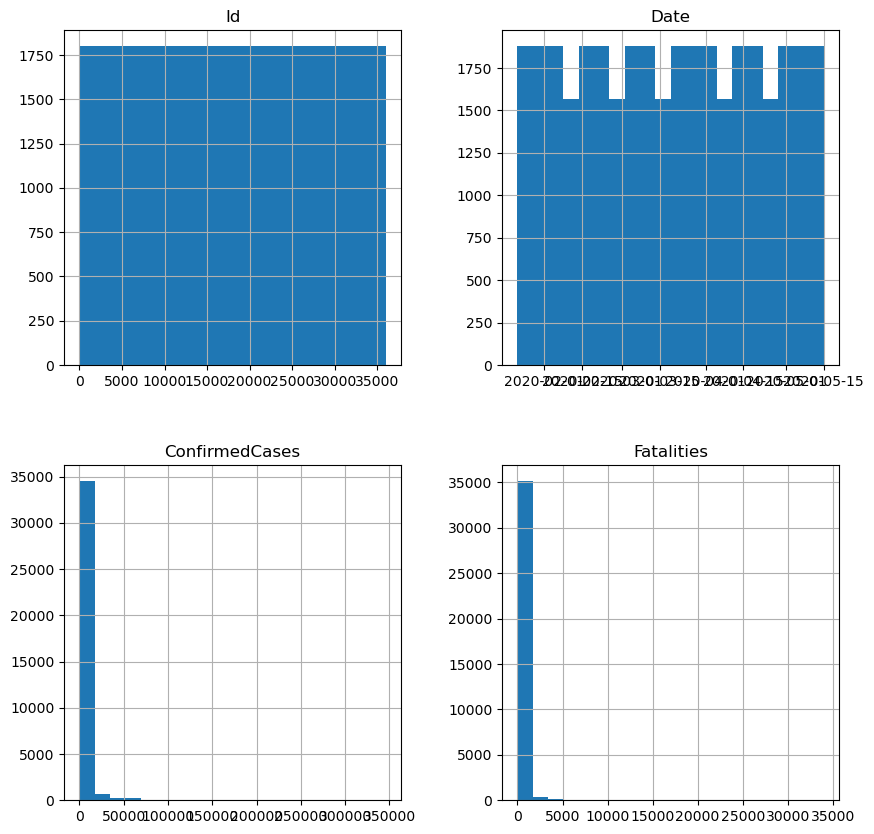

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
Train.hist(bins = 20, figsize = (10,10)) 
plt.show()

### Comapring India, China, and United States Total Confirmed Cases vs Fatalities

Text(0.5, 0, 'Date')

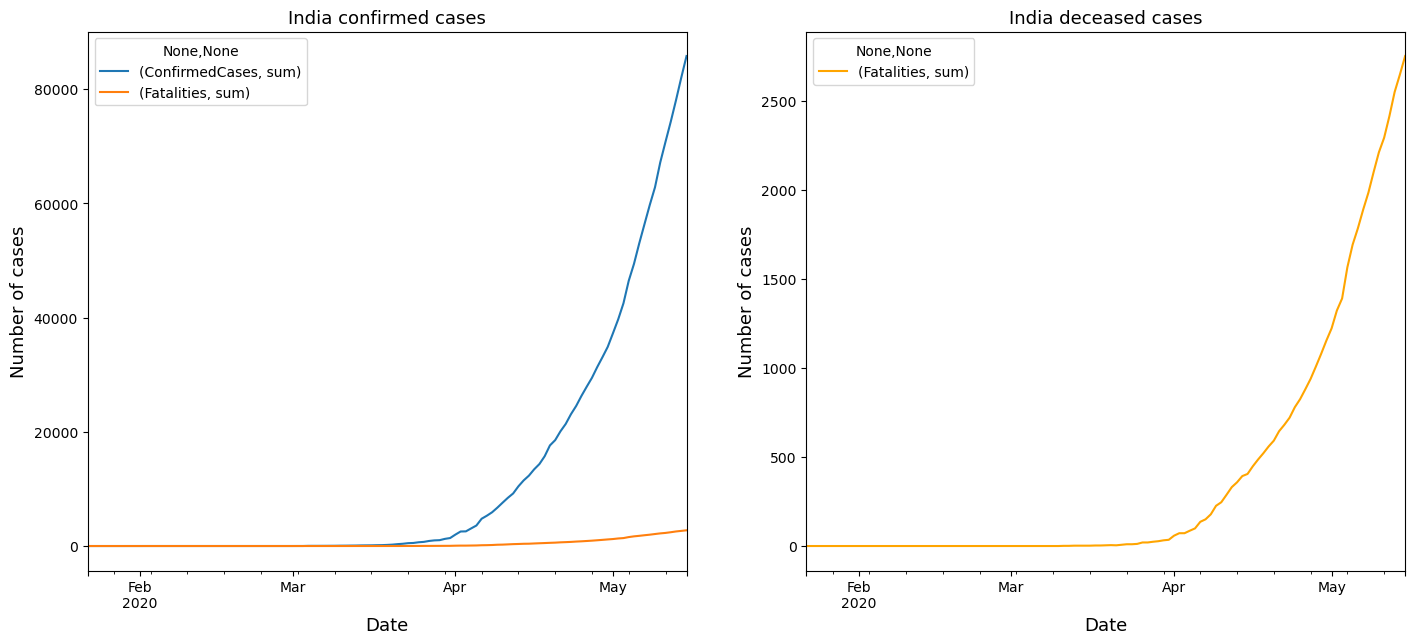

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
# Indai
totalIndia = Train[Train['Country_Region']=='India'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalIndia = Train[Train['Country_Region']=='India'].groupby(['Date']).agg({'Fatalities':['sum']})
dateIndia = totalIndia.join(fatalIndia)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
dateIndia.plot(ax=ax1)
ax1.set_title("India confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalIndia.plot(ax=ax2, color='orange')
ax2.set_title("India deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

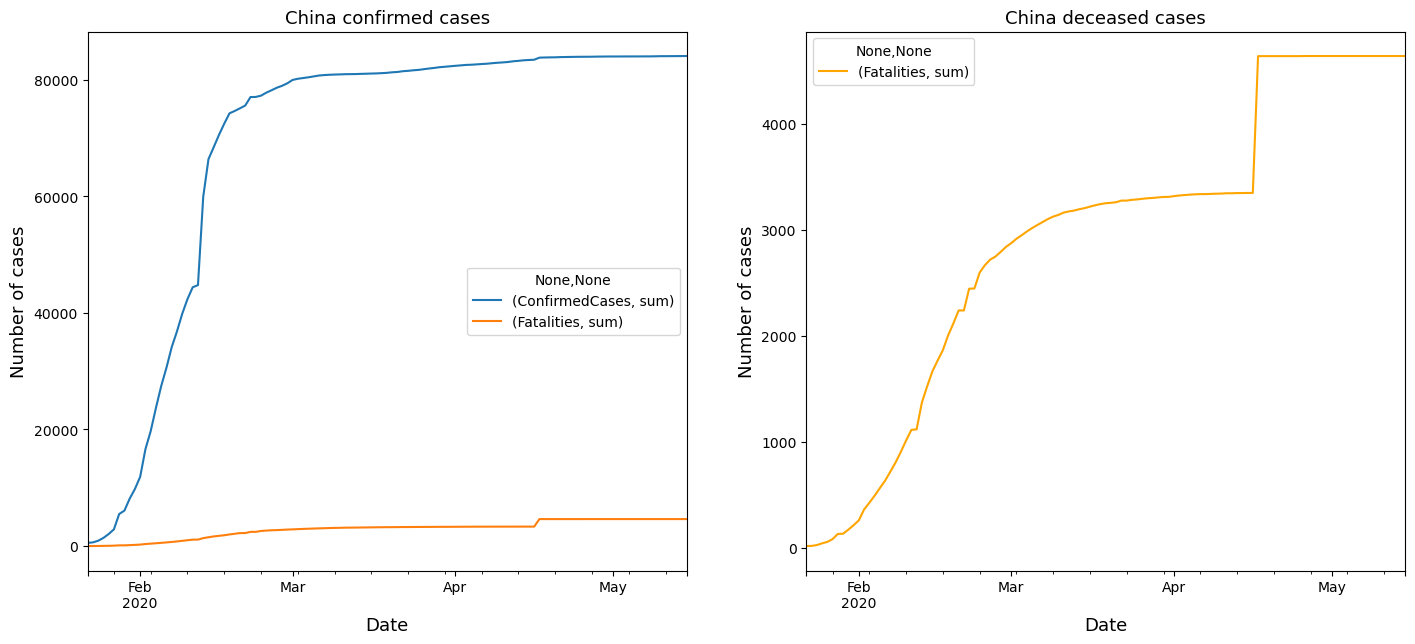

In [24]:
# China
totalChina = Train[Train['Country_Region']=='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalChina = Train[Train['Country_Region']=='China'].groupby(['Date']).agg({'Fatalities':['sum']})
dateChina = totalChina.join(fatalChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
dateChina.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalChina.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

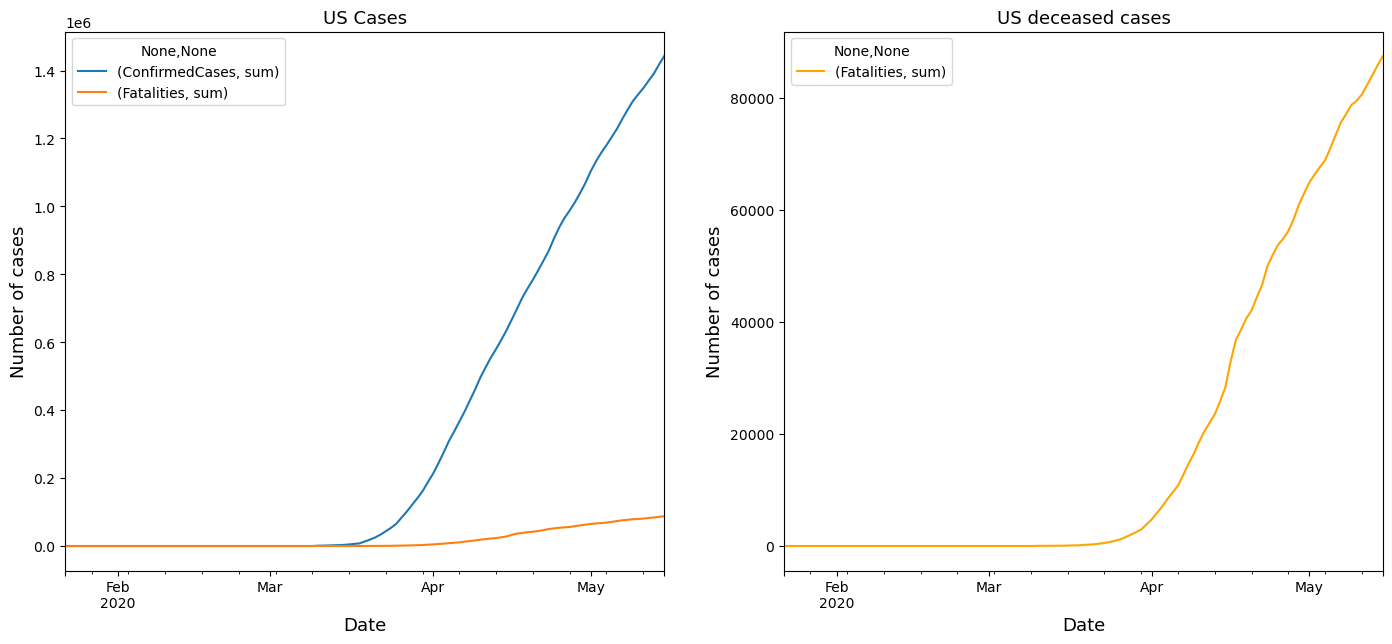

In [25]:
# United States
totalUS = Train[Train['Country_Region']=='US'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalUS = Train[Train['Country_Region']=='US'].groupby(['Date']).agg({'Fatalities':['sum']})
dateUS = totalUS.join(fatalUS)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
dateUS.plot(ax=ax1)
ax1.set_title("US Cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalUS.plot(ax=ax2, color='orange')
ax2.set_title("US deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

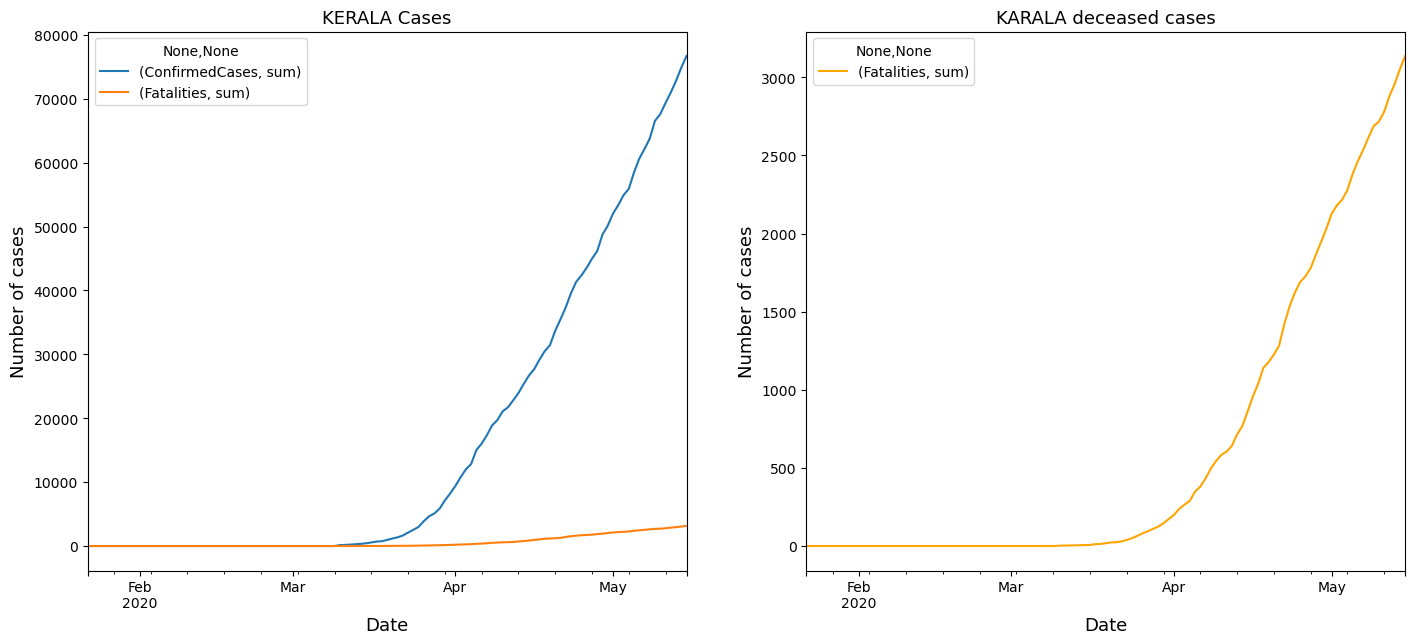

In [26]:
# India - kerala
totalKA = Train[Train['Province_State']=='Kerala'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalKA = Train[Train['Province_State']=='Kerala'].groupby(['Date']).agg({'Fatalities':['sum']})
dateKA = totalKA.join(fatalKA)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
dateKA.plot(ax=ax1)
ax1.set_title("KERALA Cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalKA.plot(ax=ax2, color='orange')
ax2.set_title("KARALA deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

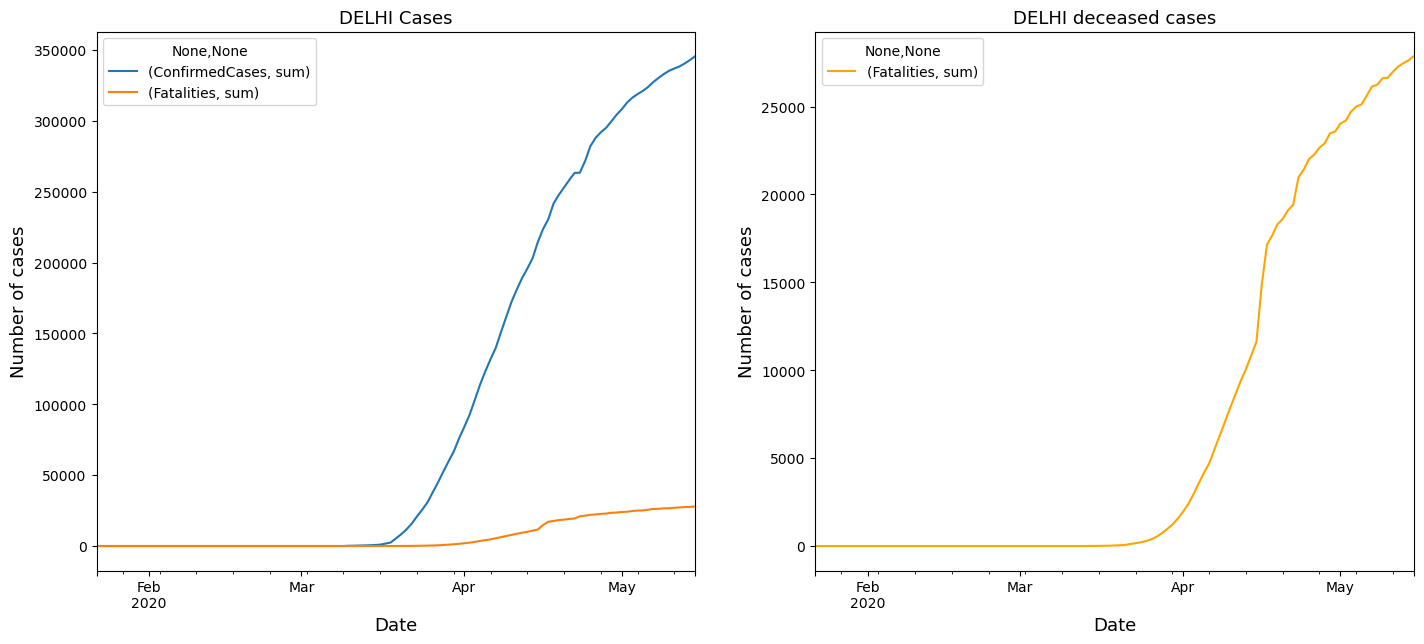

In [27]:
# India- Delhi
totalDL = Train[Train['Province_State']=='Delhi'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalDL = Train[Train['Province_State']=='Delhi'].groupby(['Date']).agg({'Fatalities':['sum']})
dateDL = totalDL.join(fatalDL)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
dateDL.plot(ax=ax1)
ax1.set_title("DELHI Cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalDL.plot(ax=ax2, color='orange')
ax2.set_title("DELHI deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

In [28]:
dateDL

,ConfirmedCases,Fatalities
,sum,sum
Date,,
2020-01-22,0.0,0.0
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
...,...,...
2020-05-11,337055.0,26988.0
2020-05-12,338485.0,27284.0


In [29]:
dateDL2 = dateDL.iloc[0:100,0]
dateDL2

Date
2020-01-22         0.0
2020-01-23         0.0
2020-01-24         0.0
2020-01-25         0.0
2020-01-26         0.0
                ...   
2020-04-26    288045.0
2020-04-27    291996.0
2020-04-28    295106.0
2020-04-29    299691.0
2020-04-30    304372.0
Name: (ConfirmedCases, sum), Length: 100, dtype: float64

In [30]:
dateDL2.shape

(100,)

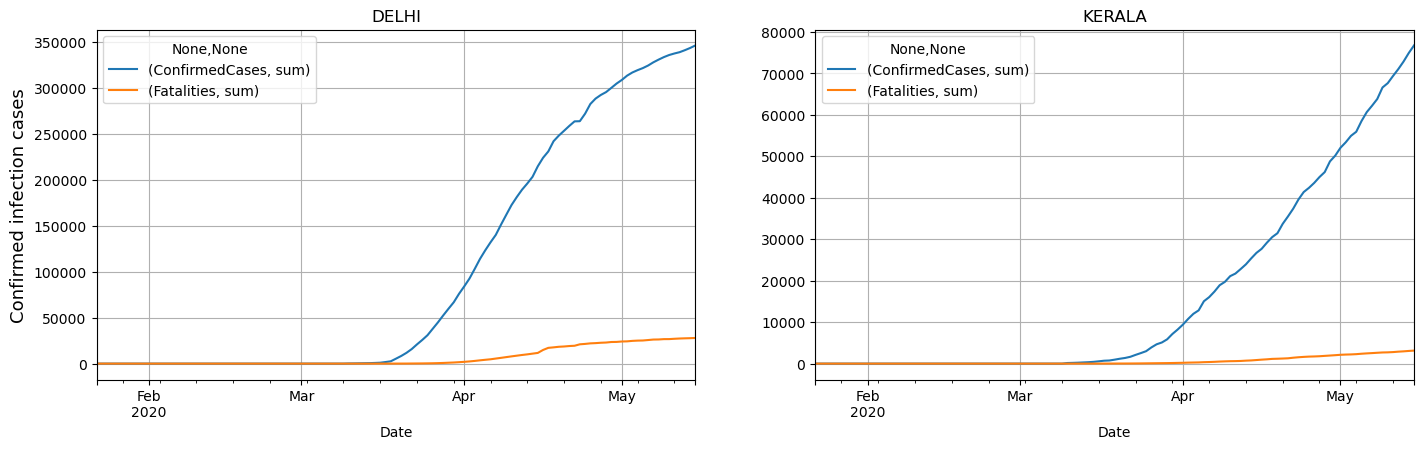

In [31]:
plt.figure(figsize=(17,10))
plt.subplot(2, 2, 1)
dateDL.plot(ax=plt.gca(), title='DELHI')
plt.ylabel("Confirmed infection cases", size=13)
plt.grid()
plt.subplot(2, 2, 2)
dateKA.plot(ax=plt.gca(), title='KERALA')
plt.grid()

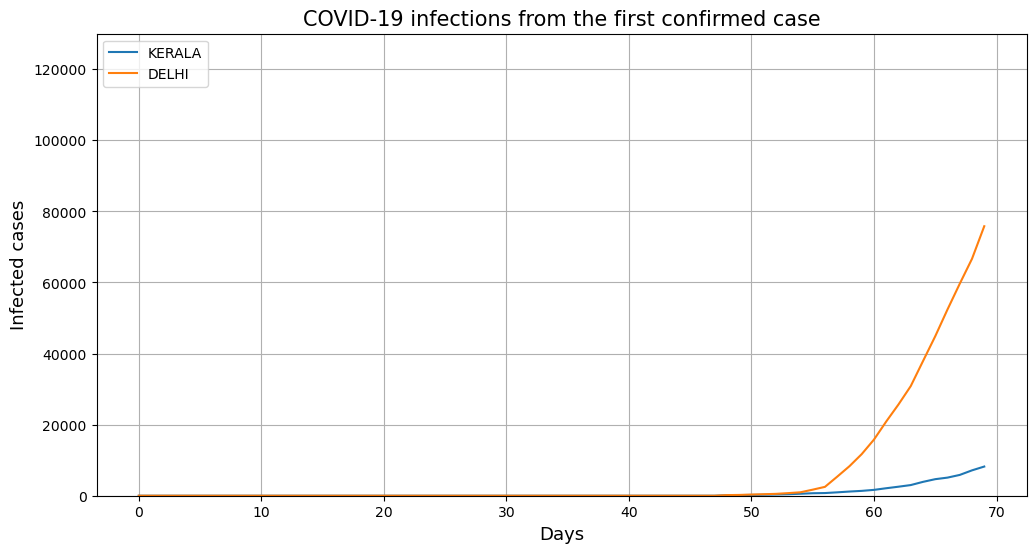

In [32]:
KA = [i for i in dateKA.ConfirmedCases['sum'].values]
KA_30 = KA[0:70] 
DL = [i for i in dateDL.ConfirmedCases['sum'].values]
DL_30 = DL[0:70] 


# Plots
plt.figure(figsize=(12,6))
plt.plot(KA_30)
plt.plot(DL_30)
plt.legend(["KERALA", "DELHI"], loc='upper left')
plt.title("COVID-19 infections from the first confirmed case", size=15)
plt.xlabel("Days", size=13)
plt.ylabel("Infected cases", size=13)
plt.ylim(0, 130000)
plt.grid()
plt.show()

## 1. Prediction of Indian Cases - Logistic Regression

In [33]:
trainData = Train.groupby(["Date","Country_Region"], as_index=False).agg({"ConfirmedCases":["sum"],"Fatalities":["sum"]})
trainData.columns = list(map("".join, trainData.columns.values))
trainData.columns = ["Date","Country_Region","ConfirmedCases","Fatalities"]
#trainData = pd.merge(trainData, on="Country_Region")
trainData

,Date,Country_Region,ConfirmedCases,Fatalities
0,2020-01-22,Afghanistan,0.0,0.0
1,2020-01-22,Albania,0.0,0.0
2,2020-01-22,Algeria,0.0,0.0
3,2020-01-22,Andorra,0.0,0.0
4,2020-01-22,Angola,0.0,0.0
...,...,...,...,...
21155,2020-05-15,Vietnam,314.0,0.0
21156,2020-05-15,West Bank and Gaza,375.0,2.0
21157,2020-05-15,Western Sahara,6.0,0.0
21158,2020-05-15,Zambia,654.0,7.0


In [34]:
Test

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04
3,4,NaN,Afghanistan,2020-04-05
4,5,NaN,Afghanistan,2020-04-06
...,...,...,...,...
13454,13455,NaN,Zimbabwe,2020-05-10
13455,13456,NaN,Zimbabwe,2020-05-11
13456,13457,NaN,Zimbabwe,2020-05-12
13457,13458,NaN,Zimbabwe,2020-05-13


In [35]:
# Train x,y
x_train = Train["Date"].apply(pd.to_datetime, "%m/%d/%Y")
x_train = trainData["Date"].values
y_train = trainData["ConfirmedCases"].values
x_test = Test["Date"].apply(pd.to_datetime, "%m/%d/%Y")
x_test = Test["Date"].values

In [36]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
trainData['Date'] = (encoder.fit_transform(trainData.Date))
Test['Date'] = (encoder.fit_transform(Test.Date))

In [37]:
print(x_train.shape,y_train.shape,x_test.shape,sep = '\n')

(21160,)
(21160,)
(13459,)


In [38]:
x_test_new = Test[['Date']]
x_test = list(x_test_new['Date'])

In [39]:
# Logistic Curve Equation
def log_curve(x, k, x_0, L):
    return L / (1 + np.exp(-k*(x-x_0)))

In [40]:
from scipy.optimize import curve_fit
import datetime
# Fit the model
fitParam, fitCov = curve_fit(log_curve, x_train, y_train, bounds=([0,0,0],np.inf), maxfev=100000)
estimatedK, estimatedX0, L = fitParam
# Create the predictions
logPredict = log_curve(x_test, estimatedK, estimatedX0, L)

In [41]:
logPredict.shape

(13459,)

Fatalities Prediction

In [42]:
y_train_fatal = list(trainData["Fatalities"])

In [43]:
# Fit the model
fitParamFatal, fitCovFatal = curve_fit(log_curve, x_train, y_train_fatal, bounds=([0,0,0],np.inf), maxfev=100000)
estimatedKFatal, estimatedX0Fatal, LFatal = fitParamFatal
# Create the predictions
logPredictFatal = log_curve(x_test, estimatedKFatal, estimatedX0Fatal, LFatal)

In [44]:
logPredictFatal.shape

(13459,)

In [45]:
submission = pd.DataFrame(Test["ForecastId"])

In [46]:
submission['ConfirmedCases'] = logPredict
submission['Fatalities'] = logPredictFatal
submission

,ForecastId,ConfirmedCases,Fatalities
0,1,1685.179042,3.042842e-190
1,2,3132.985305,8.271301e-190
2,3,4580.791568,2.248373e-189
3,4,5519.048604,6.111711e-189
4,5,5968.801482,1.661335e-188
...,...,...,...
13454,13455,6265.970610,9.693255e-174
13455,13456,6265.970610,2.634900e-173
13456,13457,6265.970610,7.162401e-173
13457,13458,6265.970610,1.946942e-172


In [47]:
submission.to_csv('submission.csv', index = False)